**Exploratory Data Analysis of Groceries Data**

I have access to my groceries data which contains all the information (present in german language) about the products purchased, their price, date, store location etc. It is a real-world dataset (some confidential details are hidden), comprises over a time-period of 2+ years, and has accurate details about prices, quantities, taxes. This is helpful for us to get a clear picture about the data while conducting analysis. It sparked an interest in me to carry out an analysis on this data in order to understand my purchase behavior, identify the products on which I spend majorly, trend of my monthly expenses and so on.

The EDA is as follows which is based on the questions that I have in my mind and for which I intend to find answers through this analysis using Python language and some popular data wrangling libraries.

In [168]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [169]:
#Load the products dataset and taxes dataset
products_df = pd.read_excel('/content/my_groceries_items.xlsx')
taxes_df = pd.read_excel('/content/my_groceries_tax.xlsx')

**Data Exploration**

In [170]:
#Display Products data
products_df

,Produkt,Stückzahl,Preis,Mehrwertsteuer,Datum,Zeit,Transaktionsnummer,Filale
0,Vegane KuchenVanille,1.000,1.89,A,14.04.21,19:15:00,38013,Magdeburg
1,5 Croissants gefüllt,1.000,0.99,A,14.04.21,19:15:00,38013,Magdeburg
2,Orangenfruchtsaft,1.000,1.39,B,14.04.21,19:15:00,38013,Magdeburg
3,Rahmspinat,1.000,0.59,A,14.04.21,19:15:00,38013,Magdeburg
4,Bananen kg,0.866,0.86,A,14.04.21,19:15:00,38013,Magdeburg
...,...,...,...,...,...,...,...,...
1783,Kidney-Bohnen,2.000,1.38,A,03.02.24,15:30:00,728142,Aschaffenburg
1784,Erdnusskerne,2.000,2.58,A,03.02.24,15:30:00,728142,Aschaffenburg
1785,Fl. Handseife Senset,1.000,0.65,B,03.02.24,15:30:00,728142,Aschaffenburg
1786,NatureDuschgelCitrus,1.000,1.25,B,03.02.24,15:30:00,728142,Aschaffenburg


**Description of Products Dataset:**

Produkt: Name of the Product in German. Some correspond to the Rabatt (discount) obtained due to app coupon and Pfandrückgabe (deposit returned on bottles)

Stückzahl: Quantity of the product purchased. Some values will be decimals which implies quantity in kilograms for items such as Fruits, Vegetables

Preis: Price of the product

Mehrwertsteuer: Category of tax levied on the product. Some values are Keiner means no tax, which is related to the Rabatt and Pfandrückgabe.

Datum: Date on which product is purchased

Zeit: Time at which product is purchased

Transaktionsnummer: Transaction number for the product

Filale: City in which store is located

In [171]:
#Check datatypes of Products dataframe
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1788 entries, 0 to 1787
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Produkt             1788 non-null   object 
 1   Stückzahl           1788 non-null   float64
 2   Preis               1788 non-null   float64
 3   Mehrwertsteuer      1788 non-null   object 
 4   Datum               1788 non-null   object 
 5   Zeit                1788 non-null   object 
 6   Transaktionsnummer  1788 non-null   int64  
 7   Filale              1788 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 111.9+ KB


In [172]:
#Display Taxes data
taxes_df

,Datum,Transaktionsnummer,Mehrwertsteuer A (7%),Mehrwertsteuer B (13%),Netto,Brutto
0,14.04.21,38013,0.93,0.35,15.18,16.46
1,21.04.21,48887,0.80,0.00,11.43,12.23
2,29.04.21,62259,1.17,0.35,18.58,20.10
3,08.05.21,76882,1.03,0.26,16.03,17.32
4,11.05.21,80314,0.66,0.22,10.53,11.41
...,...,...,...,...,...,...
75,03.01.24,674778,4.63,0.74,70.04,75.41
76,11.01.24,688277,3.75,0.57,56.60,60.92
77,16.01.24,696775,1.94,0.37,29.65,31.96
78,26.01.24,714144,3.75,0.43,55.84,60.02


**Description of Taxes Dataset:**
Datum: Date on which product is purchased

Transaktionsnummer: Transaction number for the product

Mehrwertsteuer A (7%): Category A tax corresponding to 7% levied on product

Mehrwertsteuer B (13%): Category B tax corresponding to 13% levied on product

Netto: Total bill amount for a transaction before taxes

Brutto: Total bill amount for a transaction after taxes

In [173]:
#Check datatypes of Taxes dataframe
taxes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Datum                   80 non-null     object 
 1   Transaktionsnummer      80 non-null     int64  
 2   Mehrwertsteuer A (7%)   80 non-null     float64
 3   Mehrwertsteuer B (13%)  80 non-null     float64
 4   Netto                   80 non-null     float64
 5   Brutto                  80 non-null     float64
dtypes: float64(4), int64(1), object(1)
memory usage: 3.9+ KB


It can be seen that in both dataframes Datum(Date) column is of object datatype. We can change it to datetime format.

In [174]:
#Changing datatypes of variables in items dataframe
products_df['Datum'] = pd.to_datetime(products_df['Datum'], format='%d.%m.%y')
products_df['Zeit'] = pd.to_datetime(products_df['Zeit'], format='%H:%M:%S').dt.time

#Changing datatypes of variables in tax dataframe
taxes_df['Datum'] = pd.to_datetime(taxes_df['Datum'], format='%d.%m.%y')

In [175]:
#Checking the datatypes again
products_df.info()
taxes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1788 entries, 0 to 1787
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Produkt             1788 non-null   object        
 1   Stückzahl           1788 non-null   float64       
 2   Preis               1788 non-null   float64       
 3   Mehrwertsteuer      1788 non-null   object        
 4   Datum               1788 non-null   datetime64[ns]
 5   Zeit                1788 non-null   object        
 6   Transaktionsnummer  1788 non-null   int64         
 7   Filale              1788 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 111.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Datum                   

We have 1788 records for products dataframe and 80 records for taxes dataframe and do not have any null values in both of them. This is because I used my personal data which I could gather through digital bills.

So, we do not need any data cleaning methods to remove any records.

In [176]:
#Check sample rows after changes
print(products_df.head())
print(taxes_df.head())

                Produkt  Stückzahl  Preis Mehrwertsteuer      Datum      Zeit  \
0  Vegane KuchenVanille      1.000   1.89              A 2021-04-14  19:15:00   
1  5 Croissants gefüllt      1.000   0.99              A 2021-04-14  19:15:00   
2     Orangenfruchtsaft      1.000   1.39              B 2021-04-14  19:15:00   
3            Rahmspinat      1.000   0.59              A 2021-04-14  19:15:00   
4            Bananen kg      0.866   0.86              A 2021-04-14  19:15:00   

   Transaktionsnummer     Filale  
0               38013  Magdeburg  
1               38013  Magdeburg  
2               38013  Magdeburg  
3               38013  Magdeburg  
4               38013  Magdeburg  
       Datum  Transaktionsnummer  Mehrwertsteuer A (7%)  \
0 2021-04-14               38013                   0.93   
1 2021-04-21               48887                   0.80   
2 2021-04-29               62259                   1.17   
3 2021-05-08               76882                   1.03   
4 2021-0

In [177]:
#Check statistics summary of Products dataframe for numerical columns
products_df.describe(include=[np.number])

,Stückzahl,Preis,Transaktionsnummer
count,1788.000000,1788.000000,1788.000000
mean,1.092556,1.141353,344823.439597
std,0.665535,0.963950,228441.890256
min,0.068000,-6.250000,0.000000
25%,1.000000,0.650000,115002.000000
50%,1.000000,0.990000,328484.000000
75%,1.000000,1.690000,576802.000000
max,25.000000,9.990000,728142.000000


Using pandas describe method gives us some interesting statistical details about the distribution of products data.

Stückzahl statistics indicate that mostly I purchased only 1 quantity (mean, median(50%)) for product and a maximum of 25 for a product.

Preis statistics indicate that mostly products cost around 1 Euro. Minimum is -6.25. Maximum price of the product which I purchased is 9.99 Euros.

We can ignore Transaktionsnummer statistics as it does not represent useful details.

In [178]:
#Check the Product related to minimum and maximum values for Stückzahl and Preis
print(products_df[products_df['Stückzahl']==0.068])
print(products_df[products_df['Stückzahl']==25])

print(products_df[products_df['Preis']==-6.25])
print(products_df[products_df['Preis']==9.99])

            Produkt  Stückzahl  Preis Mehrwertsteuer      Datum      Zeit  \
1003  Ingwer Bio kg      0.068   0.47              A 2023-01-10  19:44:00   

      Transaktionsnummer     Filale  
1003               80469  Magdeburg  
            Produkt  Stückzahl  Preis Mehrwertsteuer      Datum      Zeit  \
1378  Pfandrückgabe       25.0  -6.25              B 2023-09-25  20:00:00   

      Transaktionsnummer         Filale  
1378              508595  Aschaffenburg  
            Produkt  Stückzahl  Preis Mehrwertsteuer      Datum      Zeit  \
1378  Pfandrückgabe       25.0  -6.25              B 2023-09-25  20:00:00   

      Transaktionsnummer         Filale  
1378              508595  Aschaffenburg  
                   Produkt  Stückzahl  Preis Mehrwertsteuer      Datum  \
1297  Küchenläu' '0378567        1.0   9.99              B 2023-07-20   

          Zeit  Transaktionsnummer         Filale  
1297  18:56:00              399831  Aschaffenburg  


Firstly, the product with lowest and highest quantities i.e.,

Minimum Stückzahl of 0.068 corresponds to Ingwer (Ginger) in kgs. and Maximum Stückzahl of 25 corresponds to pfandrückgabe of 25 bottles.

Next, the produkt with lowest and highest prices i.e.,  

Minimum Preis of -6.25 is the same pfandrückgabe that I got for returning bottles and is subtracted from the bill.

Maximum Preis of 9.99 is for a product named Küchenläu.

In [179]:
#Check statistics summary of Products dataframe for categorical columns
products_df.describe(include=[object])

,Produkt,Mehrwertsteuer,Zeit,Filale
count,1788,1788,1788,1788
unique,575,3,73,2
top,App Rabatt,A,19:57:00,Magdeburg
freq,261,1296,87,1276


For categorical columns, we get different statistics summary.

It can be  seen that the Most repeated product is App Rabatt which corresponds the discount offered 261 times.  

For tax category, type A is the most repeated one with a frequency of 659. Generally, all the products which are not beverages and discounts come under tax category A. I do not consume beverages frequently and discounts are also not that common for every purchase hence, this makes sense.

Zeit which corresponds to the time at which I did shopping has highest frequency for 19:57 which is typically sometime before the store closing.

Lastly, Filale in Magdeburg city has highest frequency where I stayed for many years during my Masters.

In [180]:
#Check statistics summary of Taxes dataframe for numerical columns
taxes_df.describe()

,Transaktionsnummer,Mehrwertsteuer A (7%),Mehrwertsteuer B (13%),Netto,Brutto
count,80.000000,80.000000,80.000000,80.000000,80.000000
mean,325961.462500,1.461125,0.533000,23.690125,25.684250
std,225389.420243,0.768714,0.661005,12.007327,13.030524
min,0.000000,0.230000,-0.200000,3.330000,3.560000
25%,114666.250000,0.917500,0.160000,15.440000,16.822500
50%,307082.500000,1.365000,0.350000,22.245000,23.935000
75%,524527.000000,1.807500,0.690000,30.532500,33.185000
max,728142.000000,4.630000,4.560000,70.040000,75.410000


Some interesting statistical details about the distribution of taxes data.

Products under tax category A have attributed on an average for 1.46 Euros and a maximum of 4.63 Euros.

Products under tax category B have attributed on an average for 0.53 Euros and a maximum of 4.56 Euros. Here minimum value is -0.20 which corresponds to pfand.

These details match the previous products data insights. I spend on an average less than a Euro on beverages.

Next, Netto which is the bill amount for a transaction before taxes. So, it can be seen that on an average I spend around 24 Euros when I go for groceries shopping. Maximum that I ever spent once on groceries is 70 Euros.

Lastly, Brutto which is the bill amount for a transaction after taxes. After taxes, on an average I pay around 26 Euros and the maximum I paid is around 75 Euros.

In [181]:
#Unique count of some products
products_df['Produkt'].value_counts().unique

<bound method Series.unique of App Rabatt               261
Erdnusskerne              42
Romatomaten kg            37
Bananen kg                29
Kartoffelsnack Salz       28
                        ... 
Sonja Streichfett          1
Olivenöle zum Braten       1
WasaTasty Sna.R. Kräu      1
Knorr Knobl. Sauce         1
Fl. Handseife Senset       1
Name: Produkt, Length: 575, dtype: int64>

Unique count gives us the count of products through which we can find my frequently purchased items.

Overall, considering shopping period of 2+ years, as seen before, App Rabatt has highest count.

Coming to the actual products Erdnusskerne (Peanuts), Romatomaten (Tomatoes), Bananen (Bananas), Kartoffelsnack Salz (Potato Chips) are the ones I purchased frequently.

**Data Visualization**

**Top 20 most purchased Products along with money spent**

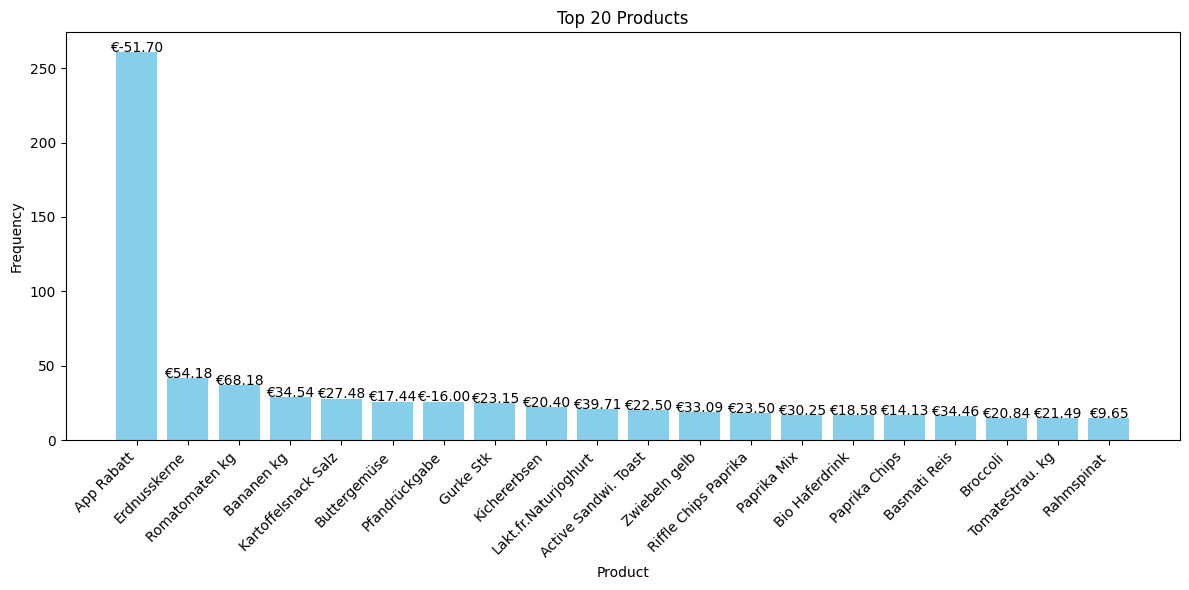

In [182]:
# Check value_counts to top 20 products
top_products = products_df['Produkt'].value_counts()[:20]

# Extract the names and counts of the top 20 products
top_product_names = top_products.index
top_product_counts = top_products.values

# Create a new DataFrame containing top products and their prices
top_products_df = pd.DataFrame({'Produkt': top_product_names})
top_products_df['Preis'] = top_products_df['Produkt'].map(products_df.groupby('Produkt')['Preis'].sum())

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(top_product_names, top_product_counts, color='skyblue')
plt.xlabel('Product')
plt.ylabel('Frequency')
plt.title('Top 20 Products')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Displaying prices as annotations on the bars
for i, count in enumerate(top_product_counts):
    plt.text(i, count + 0.1, f"€{top_products_df['Preis'][i]:.2f}", ha='center')

plt.show()

We can get more details about my frequently purchased items by plotting top 20 most purchased items along with the total amount spent on them. From the above bar graph, we can see that the frequency of most purchased items is similar to the unique count values. Also, other products are now clearly observable.

Some interesting observations are that I got around 52 Euros discount because of app. Moreover, I got 16 Euros Deposit in return for giving back the bottles. Also, out of top 20 frequent products, Kartoffelsnack Salz, Riffle Chips Paprika, and Paprika Chips are three different types of chips on which I spent a lot.

Personally, from this observation I look forward to cutting down on buying snacks like Chips and probably focus on other healthier options.

**Top 20 Transactions along with Bill Amount**

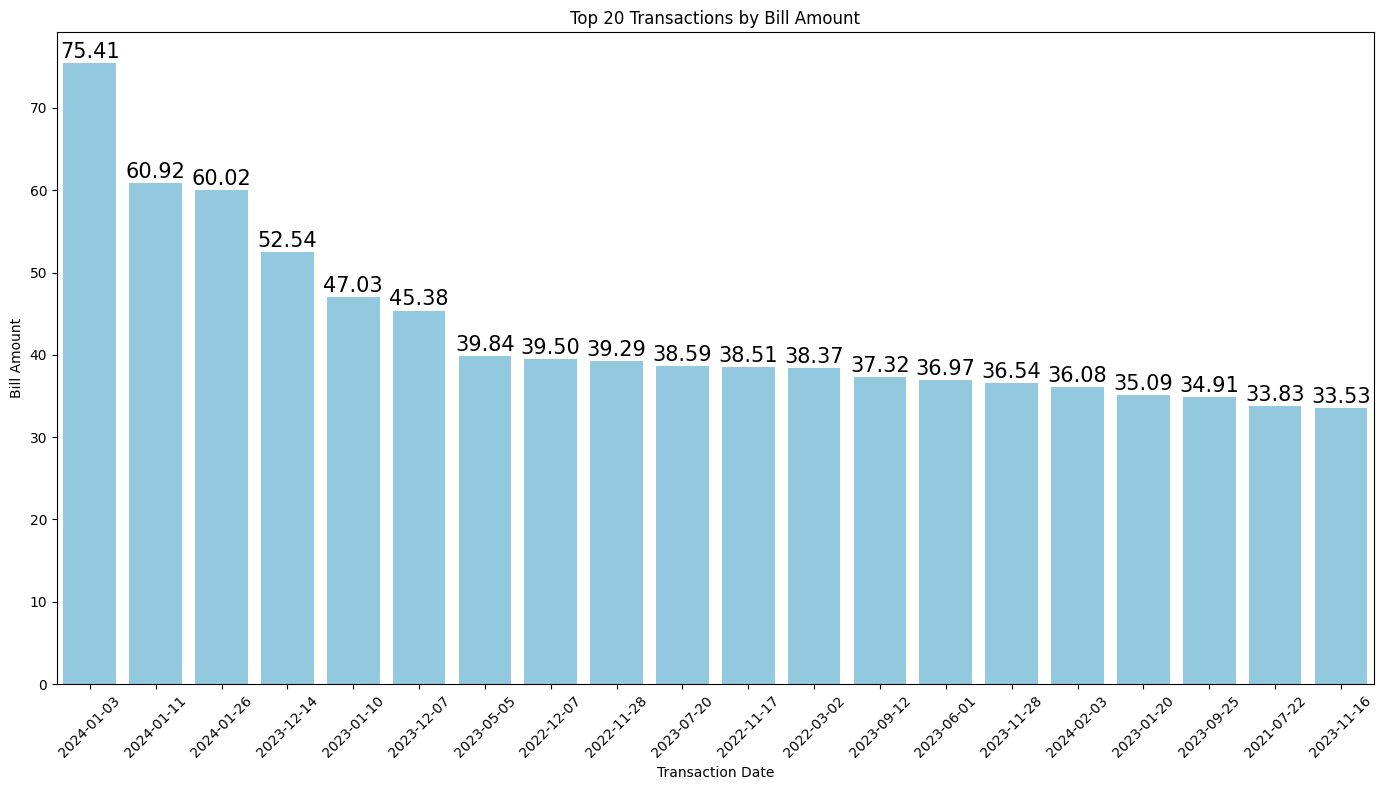

In [183]:
# Sort transactions by bill amount
sorted_transactions = taxes_df.sort_values(by='Brutto', ascending=False)

# Select top 20 transactions
top_20_transactions = sorted_transactions.head(20)

# Plotting
plt.figure(figsize=(14, 8))
txn_plot = sns.barplot(x='Datum', y='Brutto', data=top_20_transactions, color='skyblue')
plt.xlabel('Transaction Date')
plt.ylabel('Bill Amount')

for bar in txn_plot.patches:

    txn_plot.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

plt.title('Top 20 Transactions by Bill Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Above Bar plot shows us the Top 20 transactions based on final bill paid after taxes. Among these, top 6 transactions are from the last six months. Highest bill is 75.41 Euros which was on 3rd January 2024.

Overall, out of 80 transactions, only 4 transactions are above 50 Euros.

**Histogram of quantities purchased**

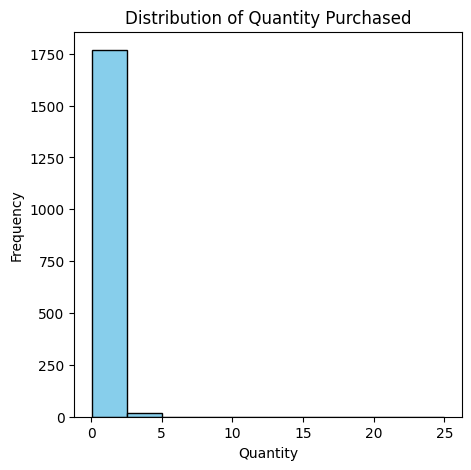

In [184]:
plt.hist(products_df['Stückzahl'], color='skyblue', edgecolor='black')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.title('Distribution of Quantity Purchased')
plt.show()

Histogram of Quantity Distribution helps us understand the frequeny of quantity. In other words, what is the most frequent count of a product in a transaction.
It can be observed that its between 0-3. Only on rare cases, its between 3-5. This is because I purchased groceries almost every week and rarely had the need to buy a product in huge quantities.

**Box plot of prices based on Tax Category**

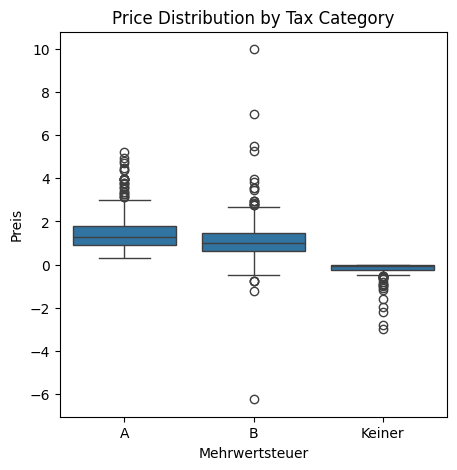

In [185]:
sns.boxplot(x='Mehrwertsteuer', y='Preis', data=products_df)
plt.title('Price Distribution by Tax Category')
plt.show()


Box plot showing the price distribution according to the category of tax is another interesting visualization. As seen previously from summary statistics, the plot's median(line inside the box) confirms that mostly the products costed close to 1 Euro. There are some outliers for all three categories. Especially for category B, which corresponds to beverages and pfand there is distinct variation in prices and can be treated as outliers.

**Time series plot of purchases over time**

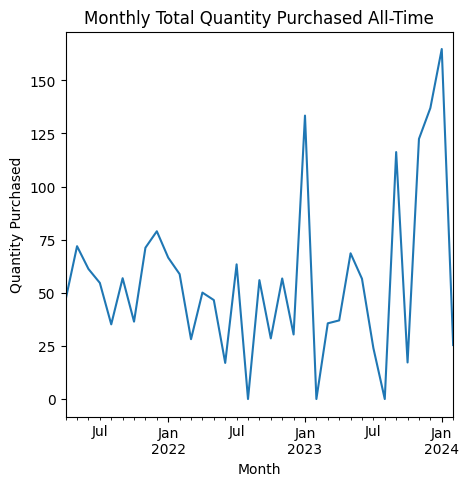

In [186]:
#products_df['Datum'] = pd.to_datetime(products_df['Datum'])

# Resample Datum to get monthly total quantity purchased
monthly_purchases = products_df.resample('M', on='Datum')['Stückzahl'].sum()
monthly_purchases.plot()
plt.xlabel('Month')
plt.ylabel('Quantity Purchased')
plt.title('Monthly Total Quantity Purchased All-Time')
plt.show()

The above plot provides an overview on monthly purchases in terms of quantity. Clearly, there are some spikes in purchase behavior. Firstly, huge spikes are noticeable in the months of January for every year and December 2023. Previously, we have also seen that the highest bill amount was recorded on 3rd January 2024. Main reason for spike in last two months is the inclusion of members and thereby need for additional purchases. Apart from that, the reasons are purchases in holiday weeks and also trying various healthier options as part of diet. Let's explore more about this in the later cells. On the contrary, some troughs can be observed in the months of August for last two years where I travelled and did not purchase through the app.

**Time series plot of expenses over time**

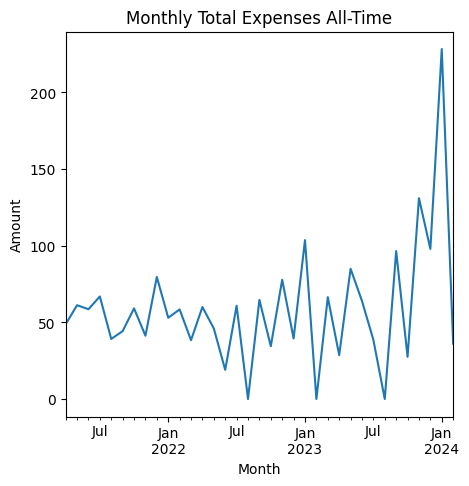

In [187]:
# Resample Datum to get monthly total expenses
monthly_expenses = taxes_df.resample('M', on='Datum')['Brutto'].sum()
monthly_expenses.plot()
plt.xlabel('Month')
plt.ylabel('Amount')
plt.title('Monthly Total Expenses All-Time')
plt.show()

The above plot provides an overview on monthly expenses in terms of amount spent on groceries. Clearly, in accordance with previous time series plot, there are some spikes in purchase behavior. Firstly, huge spikes are noticeable in the months of January for every year and December 2023. Expenses increased continously in last three months. Roughly expenses got doubled from around 100 Euros per month in Jan 2023 to 220 Euros per month in Jan 2024. The reasons are already discussed previously.

It would be interesting to see how the trend continues further in coming months.

**Finding the Top 20 products purchased in Dec 2023 and Jan 2024**

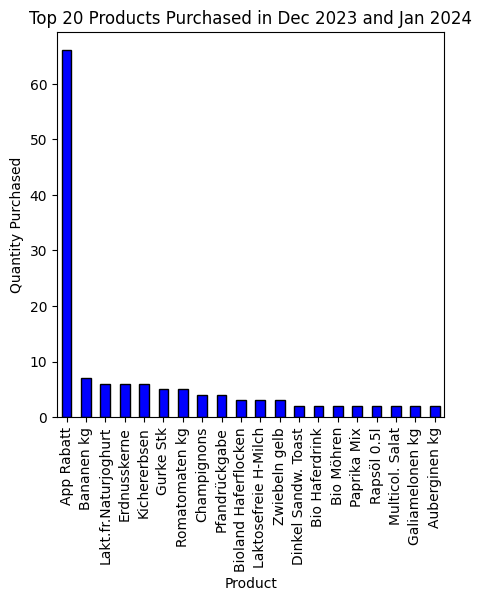

In [188]:
dec_jan = products_df[products_df['Datum'].isin(pd.date_range('2023-12-01', '2024-01-31'))]

#Top 20 most purchase products in Dec 2023 and Jan 2024
dec_jan_products = (dec_jan['Produkt'].value_counts())[:20]
dec_jan_products.plot(color='blue',kind='bar', edgecolor='black', rot=0)

#add axis labels
plt.xlabel('Product')
plt.xticks(rotation='vertical')
plt.ylabel('Quantity Purchased')
plt.title('Top 20 Products Purchased in Dec 2023 and Jan 2024')
plt.rcParams['figure.figsize'] = (5,5)
plt.show()

From the bar chart, it is clear that trend of most purchased products in these two months is similar to the overall most purchased products which was seen previously. Majorly, during the two months which had lot of holidays, discounts were offered massively and we can see that more than 60 products are shown under App Rabatt. Next, there is an increase in the purchase quantity of products like Bananen, Jogurt, Kichererbsen. Also, no chips product were purchased. Apart from that, compared to previous overview bar chart, some new products appeared like Champignons, Bio Möhren, Multi color Salat, Galiamelonen and Auberginen.

**Top 20 transactions based on Quantity**

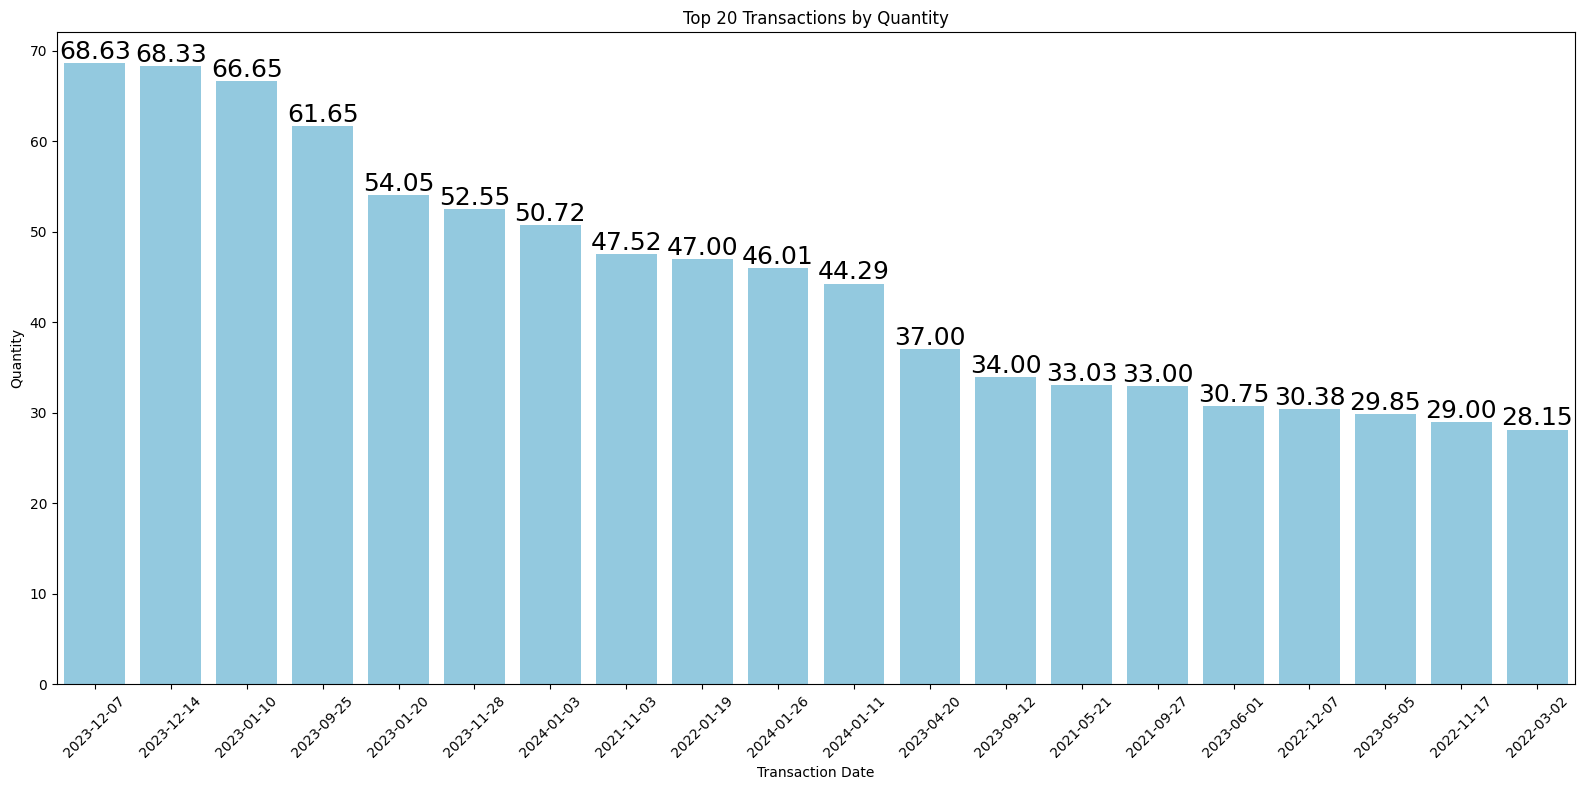

In [189]:
#Group By Date and quantity
transaction_quantity_sum = products_df.groupby('Datum')['Stückzahl'].sum().reset_index()

# Sort transactions by summed quantity in descending order
sorted_qtransactions = transaction_quantity_sum.sort_values(by='Stückzahl', ascending=False)

# Select top 20 transactions
top_20_qtransactions = sorted_qtransactions.head(20)

# Plotting
plt.figure(figsize=(16, 8))
quantity_plot = sns.barplot(x='Datum', y='Stückzahl', data=top_20_qtransactions, color='skyblue')
for bar in quantity_plot.patches:

    quantity_plot.annotate(format(bar.get_height(),'.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=18, xytext=(0, 8),
                   textcoords='offset points')
plt.xlabel('Transaction Date')
plt.ylabel('Quantity')
plt.title('Top 20 Transactions by Quantity')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

Top transactions in terms of the quantity is shown in above bar graph. Here, the quantity also includes app rabatt, pfand. Like in the case of top bill amounts, top quantities are also observed in last few months. However, not all the dates are same for both the graphs. It is due to the fact that not all transactions having higher quantities have higher bill amounts. There could be some discounts or products could not be that expensive.

**City-wise Transactions Count**

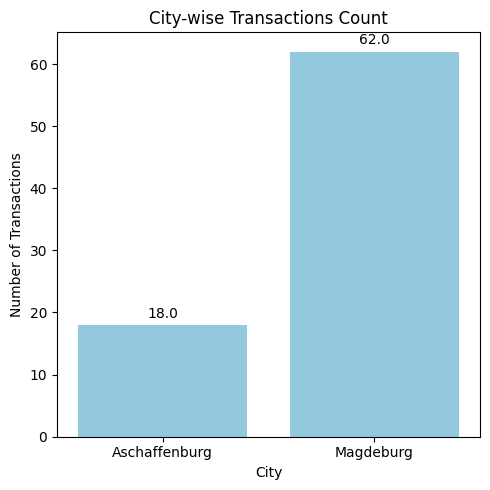

In [190]:
# Group by city and count the number of transactions in each city
city_transactions_count = products_df.groupby('Filale')['Transaktionsnummer'].nunique().reset_index()

# Plotting
plt.figure(figsize=(5, 5))
city_plot = sns.barplot(x= city_transactions_count['Filale'], y= city_transactions_count['Transaktionsnummer'], color='skyblue')
plt.xlabel('City')
plt.ylabel('Number of Transactions')
for bar in city_plot.patches:

    city_plot.annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
plt.title('City-wise Transactions Count')
plt.tight_layout()

plt.show()

Out of 80 transactions, only 20 transactions occurred in store from Aschaffenburg and the remaining all transactions are from store in Magdeburg.

**Correlation between features of Taxes dataframe**

<ipython-input-191-5ccce04d7a6d>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = only_taxes.corr()


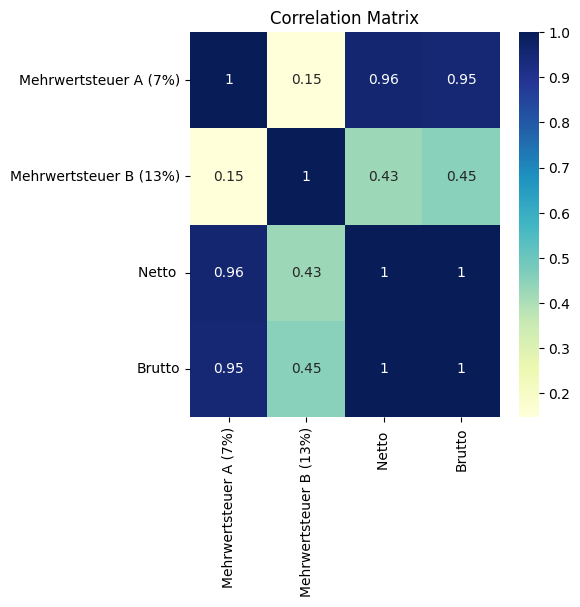

In [191]:
#Check correlation between features of Taxes dataframe
#Drop Transaktionsnummer as it is not relevant here.
only_taxes = taxes_df.drop('Transaktionsnummer', axis=1)

correlation_matrix = only_taxes.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu')
plt.title('Correlation Matrix')
plt.show()

Correlation Heatmap is clear and easy to interpret. As discussed previously, most of my purchased items were having category A tax levied on them.

So, total bill amount both Netto and Brutto would be higher if Mehrwertsteuer A is higher.

Mehrwertsteuer A is highly positively correlated with Netto and Brutto. Likewise, Netto and Brutto are completely correlated with each other.

Lastly, as expected Mehrwertsteuer B is less positively correlated with Netto and Brutto.

**Interpretation and Insights**

This was an EDA on my groceries dataset. Different types of charts were plotted and various insights were found out. I was able to find answers to questions that I always had and was curious to find through this data analysis.

It was an interesting activity and personally the insights would be helpful for me to tweak my purchase behavior to some extent.

Some of the key takeaways are:

* Cautiously reduce spending on snacks
* Try to keep taking the benefit of discounts from app
* Returning the pfand bottles for recycling
* Keep a tab on expenses during the holiday weeks
* To ensure that the monthly expenses do not get many drastic changes.